In [1]:
import pandas as pd
import matplotlib.pyplot as plt

READ IN DATA!

In [2]:
full_file = pd.read_csv("billionaire_list_20yrs.csv")
full_file

,Unnamed: 0,name,last_name,age,gender,time,permanent_country,company,main_industry,wealth_source_details,industry,state,headquarters,countries,annual_income,daily_income,birth_year,name_cleaned
0,675,Abdulla bin Ahmad Al Ghurair,Al Ghurair,67,M,2013,United Arab Emirates-Dubai,Mashreq Bank,Diversified,diversified,Diversified;Banking,NaN,NaN,are,95604000,261928,1955,abdulla_bin_ahmad_al_ghurair
1,676,Abdulla bin Ahmad Al Ghurair,Al Ghurair,67,M,2013,United Arab Emirates-Dubai,Mashreq Bank,Diversified,diversified,Diversified;Banking,NaN,NaN,are,95604000,399254,1955,abdulla_bin_ahmad_al_ghurair
2,677,Abdulla bin Ahmad Al Ghurair,Al Ghurair,67,M,2013,United Arab Emirates-Dubai,Mashreq Bank,Diversified,diversified,Diversified;Banking,NaN,NaN,are,95604000,536021,1955,abdulla_bin_ahmad_al_ghurair
3,678,Abdulla bin Ahmad Al Ghurair,Al Ghurair,67,M,2013,United Arab Emirates-Dubai,Mashreq Bank,Diversified,diversified,Diversified;Banking,NaN,NaN,are,95604000,410391,1955,abdulla_bin_ahmad_al_ghurair
4,679,Abdulla bin Ahmad Al Ghurair,Al Ghurair,67,M,2013,United Arab Emirates-Dubai,Mashreq Bank,Diversified,diversified,Diversified;Banking,NaN,NaN,are,95604000,558904,1955,abdulla_bin_ahmad_al_ghurair
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352364,358313,Zygmunt Solorz-Zak,Solorz-Zak,65,M,2022,Poland-Warsaw,Cyfrowy Polsat,Media & Entertainment,TV broadcasting; TV station,Media & Entertainment; Media;Media;Entertainment,NaN,NaN,pol,74820000,219780,1957,zygmunt_solorz_zak
352365,358314,Zygmunt Solorz-Zak,Solorz-Zak,65,M,2022,Poland-Warsaw,Cyfrowy Polsat,Media & Entertainment,TV broadcasting; TV station,Media & Entertainment; Media;Media;Entertainment,NaN,NaN,pol,74820000,207493,1957,zygmunt_solorz_zak
352366,358315,Zygmunt Solorz-Zak,Solorz-Zak,65,M,2022,Poland-Warsaw,Cyfrowy Polsat,Media & Entertainment,TV broadcasting; TV station,Media & Entertainment; Media;Media;Entertainment,NaN,NaN,pol,74820000,180887,1957,zygmunt_solorz_zak
352367,358316,Zygmunt Solorz-Zak,Solorz-Zak,65,M,2022,Poland-Warsaw,Cyfrowy Polsat,Media & Entertainment,TV broadcasting; TV station,Media & Entertainment; Media;Media;Entertainment,NaN,NaN,pol,74820000,231452,1957,zygmunt_solorz_zak


In [3]:
print(full_file.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352369 entries, 0 to 352368
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Unnamed: 0             352369 non-null  int64 
 1   name                   352369 non-null  object
 2   last_name              341519 non-null  object
 3   age                    352369 non-null  int64 
 4   gender                 340477 non-null  object
 5   time                   352369 non-null  int64 
 6   permanent_country      304678 non-null  object
 7   company                326869 non-null  object
 8   main_industry          352369 non-null  object
 9   wealth_source_details  341447 non-null  object
 10  industry               352320 non-null  object
 11  state                  159190 non-null  object
 12  headquarters           133655 non-null  object
 13  countries              352369 non-null  object
 14  annual_income          352369 non-null  int64 
 15  

MANIPULATE AND CLEAN DATA

In [4]:
#remove unnecessary columns
df = full_file.drop(['headquarters', 'state', 'name', 'last_name', 'daily_income', 'Unnamed: 0'], axis=1)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352369 entries, 0 to 352368
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   age                    352369 non-null  int64 
 1   gender                 340477 non-null  object
 2   time                   352369 non-null  int64 
 3   permanent_country      304678 non-null  object
 4   company                326869 non-null  object
 5   main_industry          352369 non-null  object
 6   wealth_source_details  341447 non-null  object
 7   industry               352320 non-null  object
 8   countries              352369 non-null  object
 9   annual_income          352369 non-null  int64 
 10  birth_year             352369 non-null  int64 
 11  name_cleaned           352369 non-null  object
dtypes: int64(4), object(8)
memory usage: 32.3+ MB
None


In [5]:
#fill in nulls
df['gender'] = df['gender'].fillna('Unknown')
df['company'] = df['company'].fillna('Unknown')
df['wealth_source_details'] = df['wealth_source_details'].fillna('Unknown')
df['industry'] = df['industry'].fillna('Unknown')
#replace missing permanent_country with country
df['permanent_country'] = df['permanent_country'].fillna(df['countries'])

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352369 entries, 0 to 352368
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   age                    352369 non-null  int64 
 1   gender                 352369 non-null  object
 2   time                   352369 non-null  int64 
 3   permanent_country      352369 non-null  object
 4   company                352369 non-null  object
 5   main_industry          352369 non-null  object
 6   wealth_source_details  352369 non-null  object
 7   industry               352369 non-null  object
 8   countries              352369 non-null  object
 9   annual_income          352369 non-null  int64 
 10  birth_year             352369 non-null  int64 
 11  name_cleaned           352369 non-null  object
dtypes: int64(4), object(8)
memory usage: 32.3+ MB
None


In [6]:
#clean gender info
df['gender'] = df['gender'].replace(['M','F','M;F'],['Male', 'Female', 'Unknown'])
df.head(3)

,age,gender,time,permanent_country,company,main_industry,wealth_source_details,industry,countries,annual_income,birth_year,name_cleaned
0,67,Male,2013,United Arab Emirates-Dubai,Mashreq Bank,Diversified,diversified,Diversified;Banking,are,95604000,1955,abdulla_bin_ahmad_al_ghurair
1,67,Male,2013,United Arab Emirates-Dubai,Mashreq Bank,Diversified,diversified,Diversified;Banking,are,95604000,1955,abdulla_bin_ahmad_al_ghurair
2,67,Male,2013,United Arab Emirates-Dubai,Mashreq Bank,Diversified,diversified,Diversified;Banking,are,95604000,1955,abdulla_bin_ahmad_al_ghurair


ANALYZE, VISUALIZE, AND INTERPRET DATA 


Total number of billionaires over the last 20 years

In [7]:
#filter names by single entry
totalppl = df.name_cleaned.nunique()
print("The total number of billionaires in the last 20 years is", totalppl, "!!!")

The total number of billionaires in the last 20 years is 5014 !!!


Top 10 Billionaires and their wealth over time

In [8]:
#sum the wealth of each, get top ten names
topten = df.groupby(['name_cleaned']).sum(numeric_only=True).drop(['age', 'birth_year', 'time'], axis=1)
ten = topten.nlargest((10),'annual_income')
ten

,annual_income
name_cleaned,
bill_gates,956388761979
warren_buffett,810449135958
carlos_slim_helu,694437722958
jeff_bezos,594087668958
bernard_arnault,582475634937
larry_ellison,559514780958
amancio_ortega,542367692937
jim_walton,416084003979
alice_walton,412401212979


Text(0.5, 0, '$ Trillions')

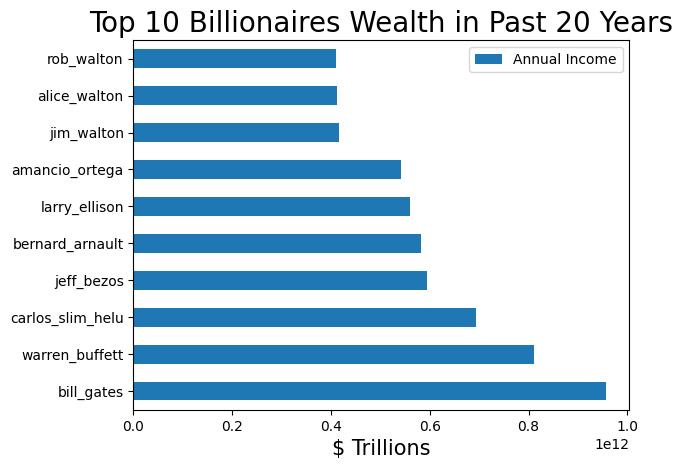

In [9]:
ten.plot(kind='barh')
plt.ylabel('')
plt.title("Top 10 Billionaires Wealth in Past 20 Years", fontsize='20')
plt.legend(["Annual Income"])
plt.xlabel('$ Trillions', fontsize='15')

In [10]:
#make a list of ten for possible use in other functions
ten_list = ten.index.tolist()
ten_list

['bill_gates',
 'warren_buffett',
 'carlos_slim_helu',
 'jeff_bezos',
 'bernard_arnault',
 'larry_ellison',
 'amancio_ortega',
 'jim_walton',
 'alice_walton',
 'rob_walton']

In [11]:
#get df with top ten names
df3 = df[(df['name_cleaned'].isin([
 'bill_gates',
 'warren_buffett',
 'carlos_slim_helu',
 'jeff_bezos',
 'bernard_arnault',
 'larry_ellison',
 'amancio_ortega',
 'jim_walton',
 'alice_walton',
 'rob_walton']))]  

df3.drop_duplicates()

,age,gender,time,permanent_country,company,main_industry,wealth_source_details,industry,countries,annual_income,birth_year,name_cleaned
17512,72,Female,2002,United States-Texas-Fort Worth,Walmart;Wal-Mart,Fashion & Retail,Walmart; Wal-Mart,Fashion & Retail; Fashion and Retail; Billiona...,usa,822255000,1950,alice_walton
17533,72,Female,2003,United States-Texas-Fort Worth,Walmart;Wal-Mart,Fashion & Retail,Walmart; Wal-Mart,Fashion & Retail; Fashion and Retail; Billiona...,usa,633105000,1950,alice_walton
17554,72,Female,2004,United States-Texas-Fort Worth,Walmart;Wal-Mart,Fashion & Retail,Walmart; Wal-Mart,Fashion & Retail; Fashion and Retail; Billiona...,usa,721200000,1950,alice_walton
17575,72,Female,2005,United States-Texas-Fort Worth,Walmart;Wal-Mart,Fashion & Retail,Walmart; Wal-Mart,Fashion & Retail; Fashion and Retail; Billiona...,usa,627480000,1950,alice_walton
17596,72,Female,2006,United States-Texas-Fort Worth,Walmart;Wal-Mart,Fashion & Retail,Walmart; Wal-Mart,Fashion & Retail; Fashion and Retail; Billiona...,usa,537882000,1950,alice_walton
...,...,...,...,...,...,...,...,...,...,...,...,...
333842,91,Male,2018,United States-Nebraska-Omaha,Berkshire Hathaway,Finance & Investments,Berkshire Hathaway,Finance & Investments; Finance and Investments...,usa,2406600000,1931,warren_buffett
333863,91,Male,2019,United States-Nebraska-Omaha,Berkshire Hathaway,Finance & Investments,Berkshire Hathaway,Finance & Investments; Finance and Investments...,usa,2314125000,1931,warren_buffett
333884,91,Male,2020,United States-Nebraska-Omaha,Berkshire Hathaway,Finance & Investments,Berkshire Hathaway,Finance & Investments; Finance and Investments...,usa,1856925000,1931,warren_buffett
333905,91,Male,2021,United States-Nebraska-Omaha,Berkshire Hathaway,Finance & Investments,Berkshire Hathaway,Finance & Investments; Finance and Investments...,usa,2534400000,1931,warren_buffett


([<matplotlib.axis.XTick at 0x289c88eee20>,
 [Text(2002, 0, '2002'),
  Text(2006, 0, '2006'),
  Text(2010, 0, '2010'),
  Text(2014, 0, '2014'),
  Text(2018, 0, '2018'),
  Text(2022, 0, '2022')])

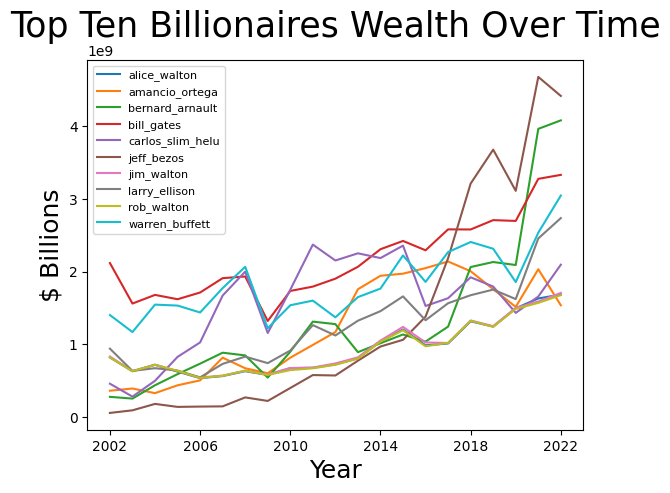

In [12]:
#plot
mapten = pd.DataFrame(df3, columns=["name_cleaned", "time", "annual_income"])
mapten.set_index('time', inplace=True)
mapten.groupby('name_cleaned')['annual_income'].plot(legend=True)
plt.figsize=(10,30)
plt.title("Top Ten Billionaires Wealth Over Time", fontsize='25')
plt.xlabel('Year', fontsize='18')
plt.ylabel("$ Billions", fontsize='18')
plt.legend(fontsize="8")
x_ticks = [2002, 2006, 2010, 2014, 2018, 2022]
plt.xticks(ticks=x_ticks)

Total Wealth of Billionaires Over Last 20 Years-- 
You can see there was a dips in 2020 and 2009, likely due to the pandemic and housing crisis.

Text(0, 0.5, 'Trillions')

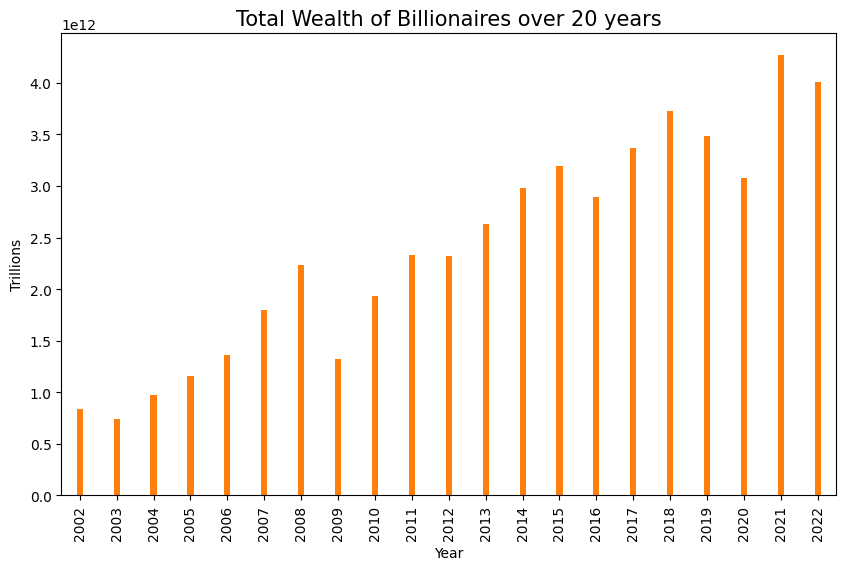

In [13]:
#filter data by years
yearly_total = df.groupby(['time']).sum(numeric_only=True)
#plot
yearly_total.plot(kind='bar', legend=None,figsize=(10,6))
plt.title("Total Wealth of Billionaires over 20 years", fontsize='15')
plt.xlabel('Year', fontsize='10')
plt.ylabel("Trillions", fontsize='10')

Gender Data

In [14]:
#get total numbers of gender
sex = df.drop_duplicates(subset = ['name_cleaned'])
mapsex = sex['gender'].value_counts()
mapsex

Male       3618
Unknown     952
Female      444
Name: gender, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

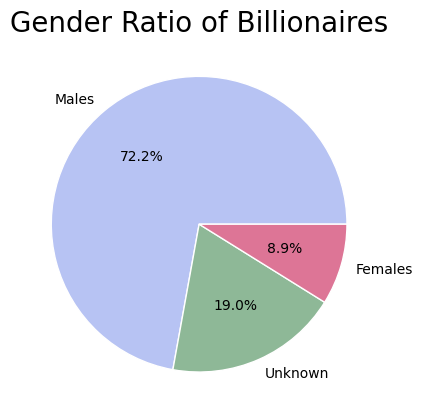

In [15]:
colors = ['#B7C3F3','#8EB897','#DD7596']
names = ["Males", "Unknown", "Females"]
plt.pie(mapsex, labels=names, autopct='%1.1f%%', wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors=colors)
plt.title("Gender Ratio of Billionaires", fontsize="20")
plt.ylabel('')
plt.rcParams["figure.figsize"] = (20,10)
plt.show

Who is the youngest Billionaire? 
Answer: Kevin David Lehmann owns the leading drugstore chain in Germany.

In [16]:
df2 = df.drop(df.iloc[:, [2,4,7,8]],axis = 1)
ages = df2.groupby(['name_cleaned']).max()
youngest = ages.nlargest((1),'birth_year')
youngest

,age,gender,permanent_country,main_industry,wealth_source_details,annual_income,birth_year
name_cleaned,,,,,,,
kevin_david_lehmann,19,Male,deu,Fashion & Retail,drugstores,87120000,2003


Average Annual Income by Age- It appears the age with the highest income level is 38.

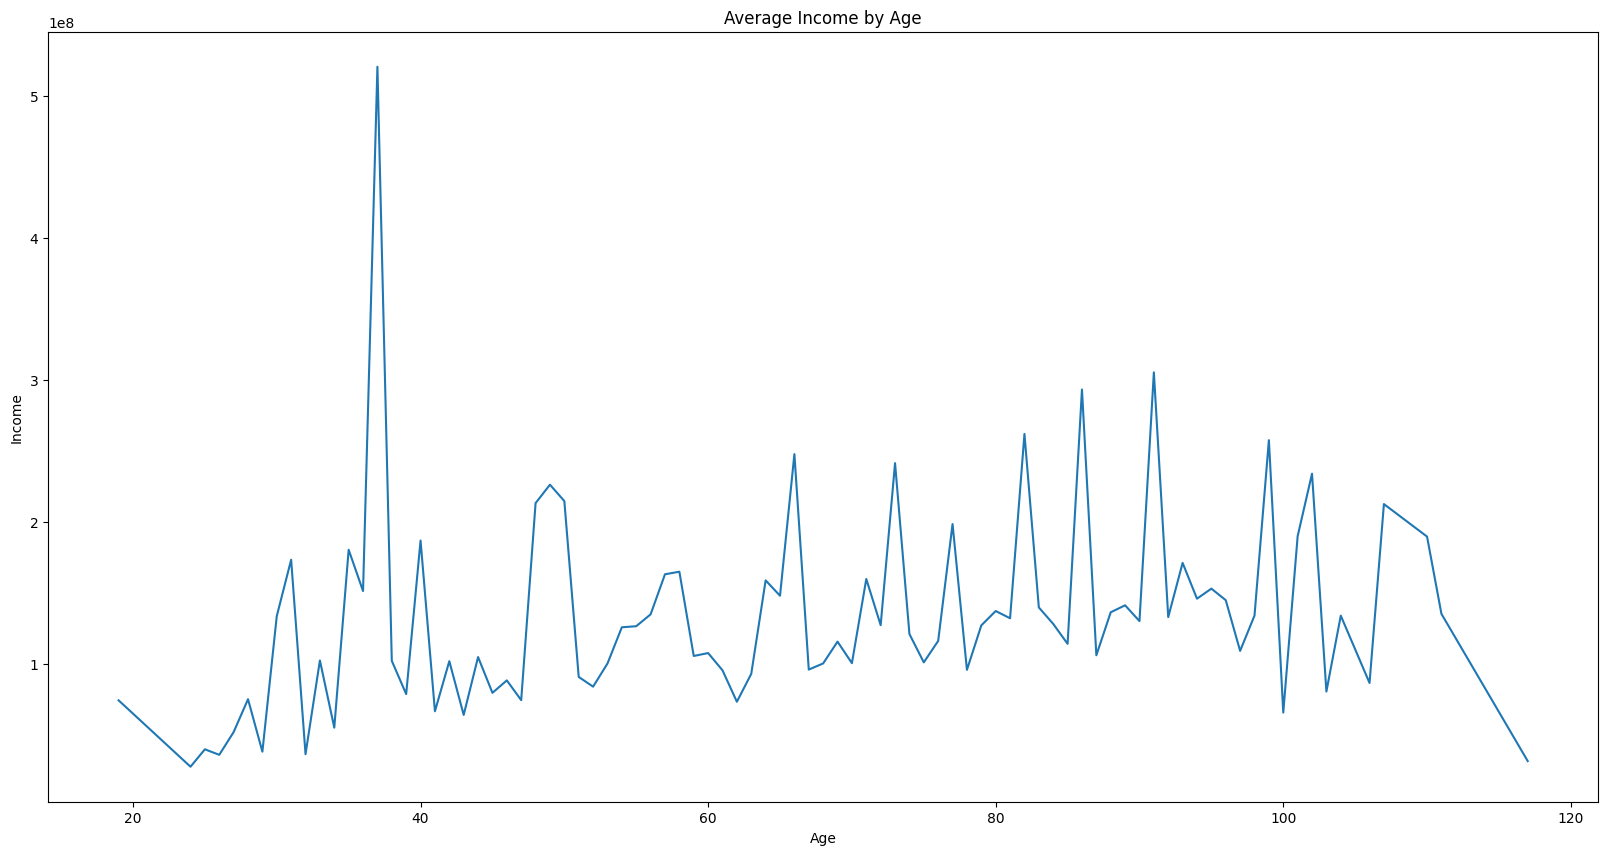

In [17]:
age_df = df.groupby('age').annual_income.mean()

#plot info
age_df.plot(kind='line')
plt.title("Average Income by Age")
plt.xlabel("Age")
plt.ylabel("Income")
plt.rcParams["figure.figsize"] = (20,10)

Top 10 Industries of the Wealthy in the last 20 years

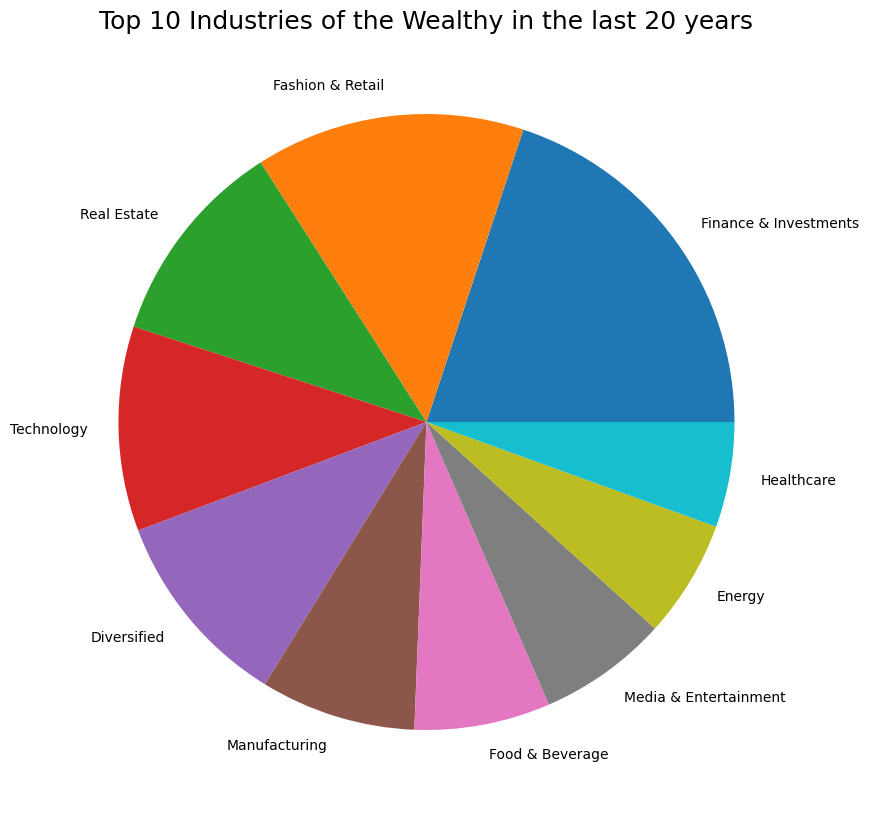

In [18]:
ind = df.main_industry.value_counts()
ind.head(10).plot(kind='pie')
plt.ylabel('')
plt.title("Top 10 Industries of the Wealthy in the last 20 years", fontsize='18')
plt.rcParams["figure.figsize"] = (20,10)

Top Three Industries by Gender

In [19]:
girls = sex[sex['gender'] == "Female"]
print("Female Billionaire's Leading Industries:")
girls.main_industry.value_counts().head(3)

Female Billionaire's Leading Industries:


Fashion & Retail    52
Manufacturing       50
Food & Beverage     44
Name: main_industry, dtype: int64

In [20]:
boys = sex[sex['gender'] == "Male"]
print("Male Billionaires' Leading Industries:")
boys.main_industry.value_counts().head(3)

Male Billionaires' Leading Industries:


Manufacturing            438
Technology               428
Finance & Investments    400
Name: main_industry, dtype: int64